## Analysis
etc.

- __Datos recibidos:__ [Meteorología,](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zw==)
[Contamianción](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zg==)
- __Responsable:__ Daniel Bustillos
- __Contacto:__  juandaniel.bucam@gmail.com


In [318]:
import pandas as pd
import seaborn as sns

import seaborn


Read processed pollution an weather data from 2015 to 2020 (may):

In [291]:
df_15 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2015.csv")
df_15 = df_15[df_15['mes']<5]

df_16 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2016.csv")
df_16 = df_16[df_16['mes']<5]

df_17 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2017.csv")
df_17 = df_17[df_17['mes']<5]

df_18 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2018.csv")
df_18 = df_18[df_18['mes']<5]

df_19 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2019.csv")
df_19 = df_19[df_19['mes']<5]

df_20 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2020.csv")
df_20 = df_20[df_20['mes']<5]

Juntar las 5 tablas en una

In [292]:
df_append = pd.DataFrame(columns=df_19.columns.tolist())#change to 2019

df_append = df_append.append(df_15, ignore_index=True,sort=True)
df_append = df_append.append(df_16, ignore_index=True,sort=True)
df_append = df_append.append(df_17, ignore_index=True,sort=True)
df_append = df_append.append(df_18, ignore_index=True,sort=True)
df_append = df_append.append(df_19, ignore_index=True,sort=True)
df_append = df_append.append(df_20, ignore_index=True,sort=True)


Arreglar fechas

In [293]:
df_append['año'] = df_append['fecha'].str[:4]

df_append['fecha'] = pd.to_datetime(df_append['fecha'], format='%Y-%m-%d %H:%M:%S')

In [294]:
df_append['fecha'] = pd.to_datetime(df_append['fecha']) - pd.to_timedelta(7, unit='d')

#### Obtener promedio por semana del año (considerando todas las estaciones)

Get week number

In [295]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

In [296]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def q1(x):
    return x.quantile(0.1)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.9)

df_pm10 = df_append.groupby(['week', 'año'])[["PM10"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_pm10.columns = ['week', 'año', 'PM10_p1', 'PM10_mean', 'PM10_p9']

df_pm25 = df_append.groupby(['week', 'año'])[["PM2.5"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_pm25.columns = ['week', 'año', 'PM25_p1', 'PM25_mean', 'PM25_p9']

df_O3 = df_append.groupby(['week', 'año'])[["O3"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_O3.columns = ['week', 'año', 'O3_p1', 'O3_p1n', 'O3_p1']

generar fechas sin hora-min

filtrar primeras 18 semanas

In [297]:
df_pm10 = df_pm10[df_pm10['week']<= 18]
df_pm25 = df_pm25[df_pm25['week']<= 18]
df_O3 = df_O3[df_O3['week']<= 18]

### Resultados

In [337]:
sns.set_style("whitegrid")
a4_dims = (11.7, 8.27)
sns.set(rc={"lines.linewidth": 2})
sns.set_style("whitegrid")

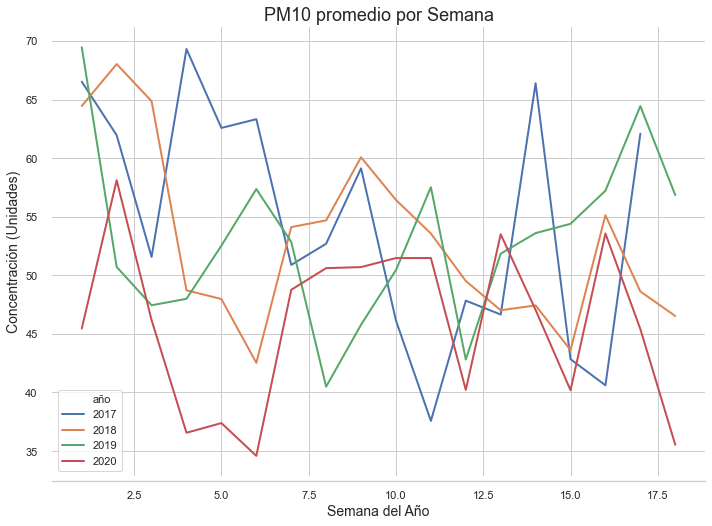

In [338]:
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.lineplot(x="week", y="PM10_mean", hue='año', data=df_pm10[df_pm10['año'].isin([2017,2018,2019,2020])],
             ax=ax, palette=sns.color_palette("deep",4))
sns.despine()
#ax.fill_between(x='week',y1='Low Value',y2='High Value', data=df_pm10)
sns.despine(offset=5, trim=False)
ax.set_title('PM10 promedio por Semana', fontsize=18)
ax.set_ylabel('Concentración (Unidades)', fontsize=14)
ax.set_xlabel('Semana del Año', fontsize=14)

sns.despine(left=True)

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.lineplot(x="week", y="PM10_mean", hue='año', data=df_pm25[df_pm25['año'].isin([2018,2019,2020])], ax=ax, palette=sns.color_palette("deep",3))
sns.despine()
#ax.fill_between(x='week',y1='Low Value',y2='High Value', data=df_pm10)
sns.despine(offset=5, trim=False)
ax.set_title('PM25 promedio por Semana', fontsize=18)
ax.set_ylabel('Concentración (Unidades)', fontsize=14)
ax.set_xlabel('Semana del Año', fontsize=14)

sns.despine(left=True)

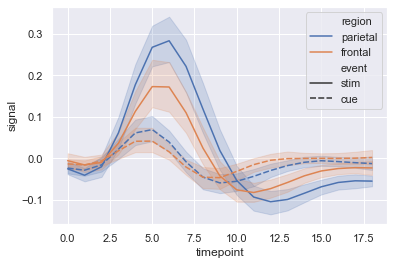

In [300]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


In [301]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
